# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the required libraries
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Data Overview

- Observations
- Sanity checks

In [3]:
#read data
df=pd.read_csv('INNHotelsGroup.csv')
##data observation
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
## Sanity Checks
## check summary of the data: Checking the summary statistics of each variable
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


From the above summary statistics, it can be observed that there are no negative values in the data. Also there no extreme outliers in the dataset as indicated by the maximum and minimum values.

In [5]:
##Check number of nan /missing values
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

From the above results, it can be seen that there no missing/nan values in the dataset. All variables do not have any missing values as indicated by count of zero.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

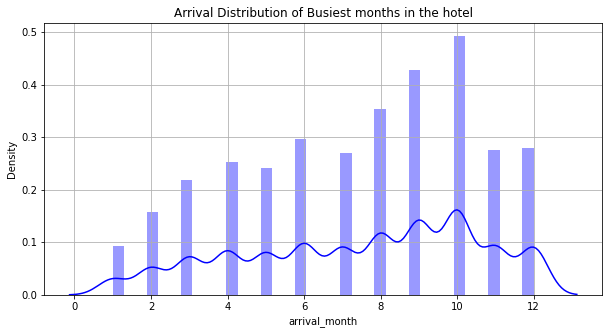

In [5]:
## What are the busiest months in the hotel?
plt.figure(figsize=(10,5))
sns.distplot(df['arrival_month'],color="blue")
plt.grid()
plt.title("Arrival Distribution of Busiest months in the hotel")
plt.show()

From the above figure, it can be seen that the the busiest months in the hotel are August, September, and October whereby the number of guest arrival is high. The month with highest number of guest arrivals is October.

In [6]:
#Which market segment do most of the guests come from?

market_segment = df.groupby('market_segment_type')['Booking_ID'].size()
market_segment = pd.DataFrame(market_segment)
market_segment.rename(columns={'Booking_ID': 'Number of Guests'}, inplace = True)
market_segment['Percentage'] = 100 * market_segment['Number of Guests']  / market_segment['Number of Guests'].sum()
market_segment

,Number of Guests,Percentage
market_segment_type,,
Aviation,125,0.344590
Complementary,391,1.077877
Corporate,2017,5.560303
Offline,10528,29.022743
Online,23214,63.994487


From the above results it can be seen that  most of the guests come from online market segment.

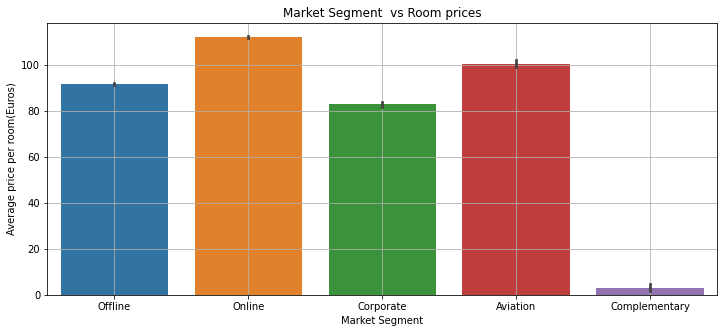

In [7]:
#Hotel rates are dynamic and change according to demand and customer demographics. 
#What are the differences in room prices in different market segments?

plt.figure(figsize=(12,5))
sns.barplot(df['market_segment_type'],df['avg_price_per_room'])
plt.grid()
plt.title("Market Segment  vs Room prices")
plt.ylabel("Average price per room(Euros)")
plt.xlabel("Market Segment")
plt.show()

From the above figure it can be observed that there are differences in the average room price in the different market segments. The 
online market segment has the highest average room price (> 100 Euros) as compared to the room price in the other market segments. 
The complementary market segment has the lowest average room price (< 20 Euros) among all other market segments which is logical since this is based on preferential or reward offers.

In [8]:
#What percentage of bookings are canceled?
cancelled = df.groupby('booking_status')['Booking_ID'].size()
cancelled = pd.DataFrame(cancelled)
cancelled.rename(columns={'Booking_ID': 'Count'}, inplace = True)
cancelled['Percentage'] = 100 * cancelled['Count']  / cancelled['Count'].sum()
cancelled

,Count,Percentage
booking_status,,
Canceled,11885,32.763611
Not_Canceled,24390,67.236389


It can be observed that 32.76% of all bookings end up being canceled.

In [9]:
#Repeating guests are the guests who stay in the hotel often and are important to brand equity. 
#What percentage of repeating guests cancel?
rcancelled = df.groupby('repeated_guest')['no_of_previous_cancellations'].size()
rcancelled = pd.DataFrame(rcancelled)
rcancelled.rename(columns={'no_of_previous_cancellations': 'Cancellation Count'}, inplace = True)
rcancelled['Percentage'] = 100 * rcancelled['Cancellation Count']  / rcancelled['Cancellation Count'].sum()
rcancelled

,Cancellation Count,Percentage
repeated_guest,,
0,35345,97.436251
1,930,2.563749


It can be observed that only 2.56%  of repeating guests cancel their hotel bookings.

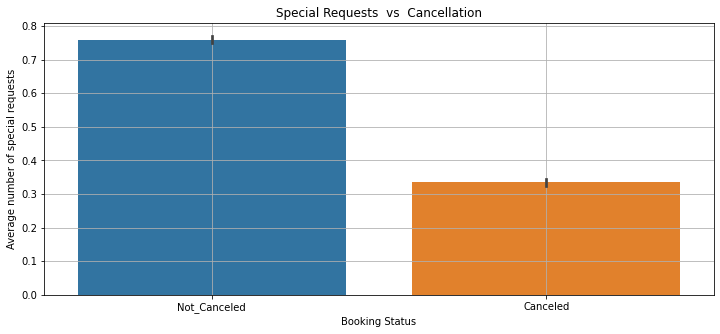

In [10]:
#Many guests have special requirements when booking a hotel room.
#Do these requirements affect booking cancellation?
plt.figure(figsize=(12,5))
sns.barplot(df['booking_status'],df['no_of_special_requests'])
plt.grid()
plt.title("Special Requests  vs  Cancellation")
plt.ylabel("Average number of special requests")
plt.xlabel("Booking Status")
plt.show()

From the above figure, it can be seen that guests who make special arrangements with the hotels are not likely to cancel their bookings as compared to the guests who do not make any special arrangements with the hotel.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [11]:
##Missing value treatment
## drop all missing values from the data
df2= df.dropna()
##Confirm whether there are nan /missing values
df2.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

It can be observed that there are no missing values in the dataset hence it is clean for use in the modelling.

In [12]:
#outliers
#0bserve statistics
df2.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [13]:
df2.head(2)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled


In [14]:
## Preparing data for modeling: 
## drop some of the columns that cannot be used in linear regression
df3 = df2.copy()
df3.drop(['Booking_ID','type_of_meal_plan','room_type_reserved','arrival_year','arrival_month','arrival_date',
          'market_segment_type','booking_status'],axis=1,inplace=True)

In [15]:
##observe final data that will be used for modelling
##working dataset
dataset = df3
dataset.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,224,0,0,0,65.00,0
1,2,0,2,3,0,5,0,0,0,106.68,1
2,1,0,2,1,0,1,0,0,0,60.00,0
3,2,0,0,2,0,211,0,0,0,100.00,0
4,2,0,1,1,0,48,0,0,0,94.50,0


In [16]:
## Preparing data for modeling
## drop some of the columns that cannot be used in linear regression
df4 = df2.copy()
df4.drop(['no_of_adults','Booking_ID','type_of_meal_plan','arrival_date','room_type_reserved','arrival_year','arrival_month',
          'market_segment_type'],axis=1,inplace=True)

In [17]:
df4.head()

,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,1,2,0,224,0,0,0,65.00,0,Not_Canceled
1,0,2,3,0,5,0,0,0,106.68,1,Not_Canceled
2,0,2,1,0,1,0,0,0,60.00,0,Canceled
3,0,0,2,0,211,0,0,0,100.00,0,Canceled
4,0,1,1,0,48,0,0,0,94.50,0,Canceled


From the steps of data preparation, the dataset is clean i.e does not contain any missing values or outliers hence ready for subsequent analysis.

## EDA

- It is a good idea to explore the data once again after manipulating it.

From the observations of the dataset, there were no modifications  done hence  no other data exploration done.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

Multicollinearity can be detected via various methods. In this part,  the most common method is used – VIF (Variable Inflation Factors).

"VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable." 

It is important to note that :
    
* VIF starts at 1 and has no upper limit

* VIF = 1, no correlation between the independent variable and the other variables

* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [18]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [19]:
#check multicollinearlity
X = dataset.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,no_of_adults,11.055011
1,no_of_children,1.219809
2,no_of_weekend_nights,1.931327
3,no_of_week_nights,3.466011
4,required_car_parking_space,1.056711
5,lead_time,2.032498
6,repeated_guest,1.504382
7,no_of_previous_cancellations,1.333044
8,no_of_previous_bookings_not_canceled,1.597831
9,avg_price_per_room,9.670255


We can see here that the 'no_of_adults' and 'avg_price_per_room' have a high VIF value, meaning they can be predicted by other independent variables in the dataset.

In [20]:
#Fixing Multicollinearity
X = dataset.drop(['no_of_adults'],axis=1)
calc_vif(X)

,variables,VIF
0,no_of_children,1.157367
1,no_of_weekend_nights,1.876268
2,no_of_week_nights,3.278428
3,required_car_parking_space,1.062054
4,lead_time,1.939126
5,repeated_guest,1.502631
6,no_of_previous_cancellations,1.332852
7,no_of_previous_bookings_not_canceled,1.601220
8,avg_price_per_room,4.114765
9,no_of_special_requests,1.715283


It can be observed that dropping one of the correlated features ('no_of_adults') helps in bringing down the multicollinearity between correlated features.

In [21]:
#final data cleaning before modelling: dropping the variable with number of adults
dataset = dataset.drop(['no_of_adults'],axis=1)
dataset.head(2)

,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0,1,2,0,224,0,0,0,65.00,0
1,0,2,3,0,5,0,0,0,106.68,1


## Building a Logistic Regression model

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, cancel, etc.) or 0 (no, not cancel, etc.)

In [22]:
df5 = df4.copy()
df5['target'] = pd.factorize(df5['booking_status'])[0]

In [23]:
df5 = df5.drop(["booking_status"],axis=1)
df5.head()

,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,target
0,0,1,2,0,224,0,0,0,65.00,0,0
1,0,2,3,0,5,0,0,0,106.68,1,0
2,0,2,1,0,1,0,0,0,60.00,0,1
3,0,0,2,0,211,0,0,0,100.00,0,1
4,0,1,1,0,48,0,0,0,94.50,0,1


In [24]:
df5['avg_price_per_room'] = df5['avg_price_per_room'].apply(np.int64)

In [25]:
##create x and y data
y = df5['target'] 
x = df5.drop('target', axis = 1)

In [26]:
#Split the data set into training data and test data
#Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

The dataset has been split into two parts: 80% training data and 20% test data

In [27]:
#Create the model
#Train the model 
lr = LogisticRegression(solver='liblinear') 
lr.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

The output created is the Logistic regression model

In [28]:
# model Intercept and Coefficient
print("Intercept: ", lr.intercept_)
print("Coefficients:")
list(zip(x, lr.coef_))

Intercept:  [-3.69476312]
Coefficients:


[('no_of_children',
  array([-0.01862254,  0.19320231,  0.0593668 , -1.18822579,  0.01275473,
         -2.08551754,  0.16920199, -0.07001699,  0.01979317, -1.0569509 ]))]

The intercept of the model is **-3.69476319**

In [29]:
#Create predictions
#Prediction with test set
y_pred_lr= lr.predict(x_test)
#Actual value and the predicted value: cancellation
lr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_lr})
lr_diff.head()

,Actual value,Predicted value
23651,0,1
27934,0,0
14968,1,1
3730,1,1
31215,0,0


The above results show the prediction of the likelihood of guests to either cancel or not cancel their bookings. The actual values show 
the initial booking status while the predicted values show the likelihood of the futurebooking status.

The factors show:
    
* 0 = Not cancelled
* 1 = Cancelled

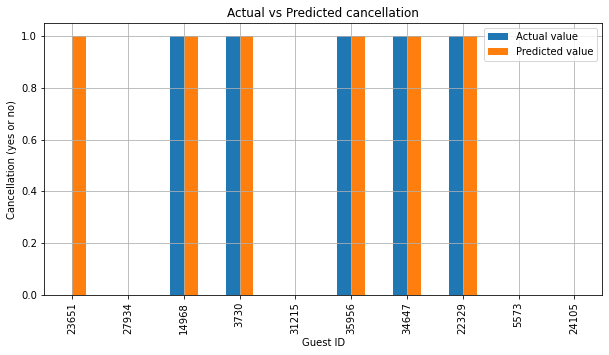

In [30]:
#observe first 10 customers prediction
lr_diff = lr_diff.head(10)
#plt.grid()
lr_diff.plot(kind='bar',figsize=(10,5),grid=True)
plt.title("Actual vs Predicted cancellation")
plt.xlabel("Guest ID")
plt.ylabel("Cancellation (yes or no)")
plt.show() #We get a bar graph that shows the Actual and Predicted values

The above figure shows the first 10 customers with the  booking status prediction. From the plot it can be observed that:
    
* The guest with ID 23651 will likely cancel his/her booking in future.
* All the other guests with ID 14968,3730,35956,34647,22329 will also cancel their bookings in future. This can be associated with the fact that they have previously cancelled their bookings.
* Gusets with ID 27934, 31215, 5573 and 24105 will not cancel their hotel bookings in future.

## Model performance evaluation

In [31]:
#Calculate performance metrics
#evaluating model performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      4898
           1       0.72      0.54      0.62      2357

    accuracy                           0.78      7255
   macro avg       0.76      0.72      0.73      7255
weighted avg       0.78      0.78      0.77      7255



From the above model performance metrics it can be concluded that the model performed  quite well with the dataset. The accuracy of the Logistic Regression model in the prediction of future hotel booking status is 78%.

## Final Model Summary

In [32]:
##logistic regression model summary
lr.coef_

array([[-0.01862254,  0.19320231,  0.0593668 , -1.18822579,  0.01275473,
        -2.08551754,  0.16920199, -0.07001699,  0.01979317, -1.0569509 ]])

The above results show all the logistic regression model coefficients

## Building a Decision Tree model

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [33]:
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

In [34]:
target = df4['booking_status']
#label encoding
le = LabelEncoder()
target = le.fit_transform(target)
target

array([1, 1, 0, ..., 1, 0, 1])

In [35]:
#define x and y
x2 = df4.iloc[:, 0:10].values
y2 = target

In [36]:
# Splitting the data - 80:20 ratio
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2 , y2, test_size = 0.2, random_state = 0)
print("Training split input- ", X_train2.shape)
print("Testing split input- ", X_test2.shape)

Training split input-  (29020, 10)
Testing split input-  (7255, 10)


The dataset has been split into test and training data. This means 80% training data and 20% test data.

In [37]:
# Defining the decision tree algorithm
from sklearn import tree
...
dtree=DecisionTreeClassifier(max_depth=2, random_state=0)
dtree.fit(X_train2,y_train2)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [38]:
# Predicting the values of test data
y_predd = dtree.predict(X_test2)

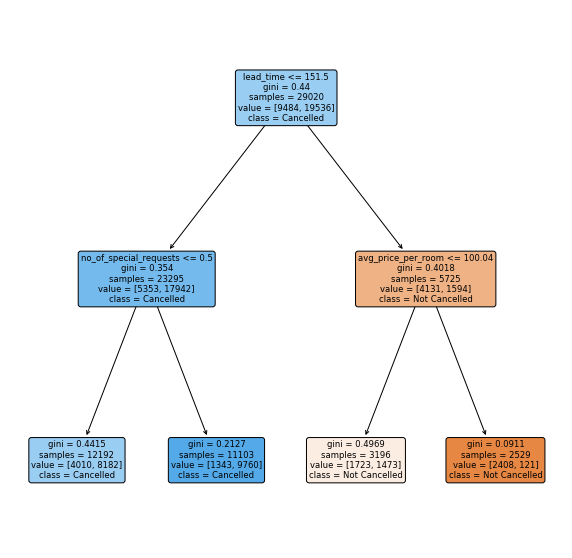

In [39]:
#define
df4a = df4[df4.columns[0:10]]
# Visualising the graph without the use of graphviz
plt.figure(figsize = (10,10))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df4a.columns, 
                     class_names =["Not Cancelled", "Cancelled"] , filled = True , precision = 4, rounded = True)

The results of the decision tree model show that 290020 samples were selected by the model. There are 23295 guests who are likely to make a few special requests and are likely to cancel their bookings. On the other hand, there are 5725 guests who are likely to book rooms with average prices as <= 100 Euros and will not cancel their bookings.

## Do we need to prune the tree?

No, there  is no need of pruning the decision tree because there are no parts of the tree that do not provide power to classify instances. 
Each node of the decision tree contains a small number of instances hence no need of pruning.

## Model Performance Comparison and Conclusions

In [40]:
#evaluating the performance of the decision tree model
print("Classification report - \n", classification_report(y_test2,y_predd))

Classification report - 
               precision    recall  f1-score   support

           0       0.73      0.43      0.54      2401
           1       0.77      0.92      0.84      4854

    accuracy                           0.76      7255
   macro avg       0.75      0.68      0.69      7255
weighted avg       0.75      0.76      0.74      7255



The model accuracy of the Decision tree  is 76% . This accuracy is quite  good in the prediction.

### Conclusions

In conclusion:

* The busiest months in the hotel are August, September and October.
* Most of the guests come from online market segment.
* The online market segment has the highest average room price (> 100 Euros) as compared to the room price in the other market segments while the complementary market segment has the lowest average room price (< 20 Euros).
* Only 32.76% of bookings are canceled.
* Only 2.56% of repeating guests cancel their hotel bookings.
* Guests who make special arrangements with the hotels are not likely to cancel their bookings as compared to the guests who do not make any special arrangements with the hotel.

Model Prediction results can be summarized as:

* The guest with ID 23651 will likely cancel his/her booking in future.
* All the other guests with ID 14968, 3730, 35956, 34647, 22329 will also cancel their bookings in future. This can be associated with the fact that they have previously cancelled their bookings.
* Gusets with ID 27934, 31215, 5573 and 24105 will not cancel their hotel bookings in future.

The model performance can be summarized as:
    
* Logistic regression model accuracy is 78%
* Decision tree model accuracy is 76%

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

From what precedes, we can conclude guests who are regulars are less likely to cancel their bookings whereas new guests are more likely to do so. Therefore, it would be interesting to implement a two-tier policy whereby regular guests have a more flexible cancellation policy whereas new guests have a more stringent cancellation policy, thereby assuring more revenue in face of the almost 1/3 cancellation rate. 

Prices should be adapted to be higher during the high season between August and October.

The hotel should adapt its booking system to allow people to more easily make special requests since these reservations have a lower cancellation rate.